In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/starbucks/starbucks.csv")

In [3]:
df.head(2)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260


In [4]:
df.shape

(242, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## 1...Analyze which Beverage_category is most frequently ordered or consumed.

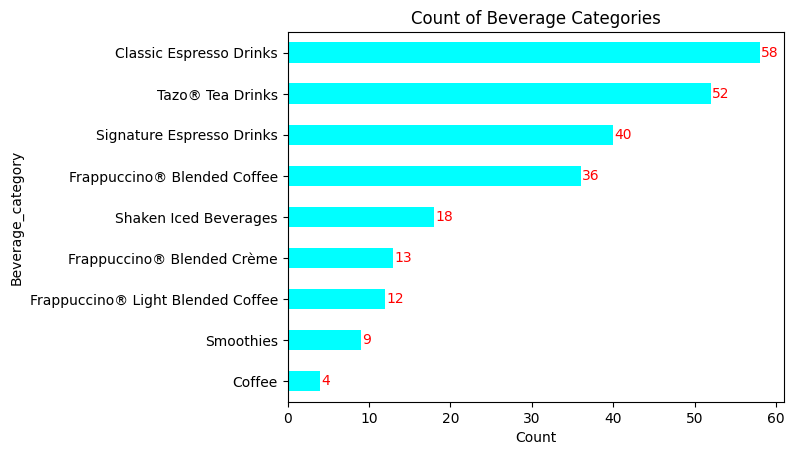

In [6]:
value_counts = df["Beverage_category"].value_counts(ascending=True)
ax =  df["Beverage_category"].value_counts(ascending=True).plot.barh(color=["cyan"])

# Annotating each bar with its count value
for i, v in enumerate(value_counts):
    ax.text(v + 0.1, i, str(v), color='red', va='center')
    plt.xlabel('Count')
plt.title('Count of Beverage Categories')

# Show the plot
plt.show()


## 2...Analyze which  Beverage is most frequently ordered or consumed.

<Axes: ylabel='Beverage'>

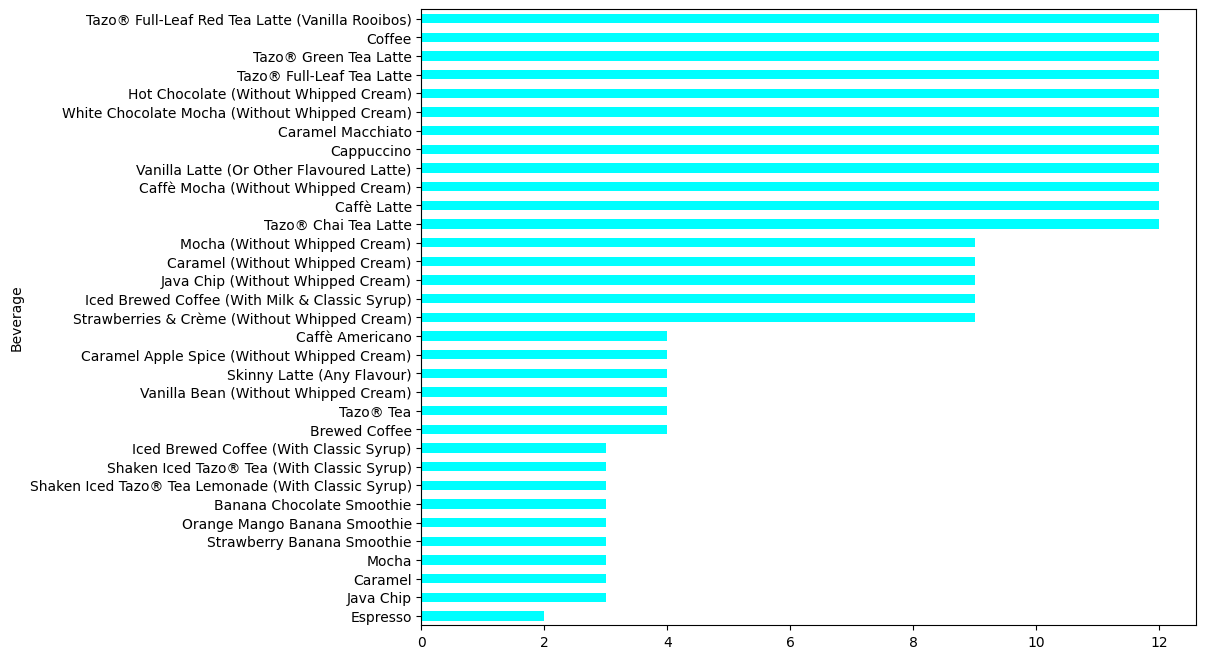

In [7]:
plt.figure(figsize=(10,8))
df["Beverage"].value_counts(ascending=True).plot.barh(color=["cyan"])

### ***I am going to focus only on identifying healthier options within the Starbucks beverage dataset. By examining the nutritional information available in the dataset, individuals can make informed decisions about which beverages align best with their health goals and dietary preferences.


# 1..Low-Calorie Beverages: Look for drinks with fewer calories. These are good choices if you're trying to manage your weight or keep your calorie intake lower.


In [8]:
# we have thse following beverage_category
l1=list(df["Beverage_category"].value_counts().index)
l1

['Classic Espresso Drinks',
 'Tazo® Tea Drinks',
 'Signature Espresso Drinks',
 'Frappuccino® Blended Coffee',
 'Shaken Iced Beverages',
 'Frappuccino® Blended Crème',
 'Frappuccino® Light Blended Coffee',
 'Smoothies',
 'Coffee']

### Calory for each Beverage category

<Axes: ylabel='Beverage_category'>

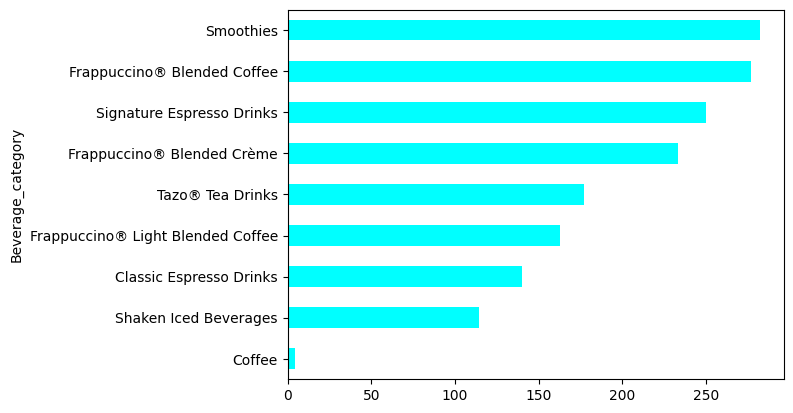

In [9]:
df.groupby("Beverage_category")["Calories"].mean().sort_values(ascending=True).plot.barh(color="cyan")

## Suppose I want to take 'Frappuccino® Blended Coffee'  but with least calories then I can see which options are available in 'Frappuccino® Blended Coffee' having least calories

### Calory distribution by Beverage options available in a particular Beverage_category

In [10]:
def Beverage_category(i):
    l2 = df[df["Beverage_category"]==i].groupby("Beverage")["Calories"].mean().sort_values(ascending=False)
    ax = l2.plot.bar(color=["cyan"]) 
    plt.xlabel(i)
    plt.ylabel("Calories")
    plt.title('Mean Calories by available beverages in the Beverage Category')
    plt.xticks(rotation=30)
    
    # Add labels on top of the bars
    for index, value in enumerate(l2):
        plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8,color="red")
        # Place the value labels above the bars with proper alignment and font size
    
    return plt.show()


## you can choose least calory drink in your favourite beverage category

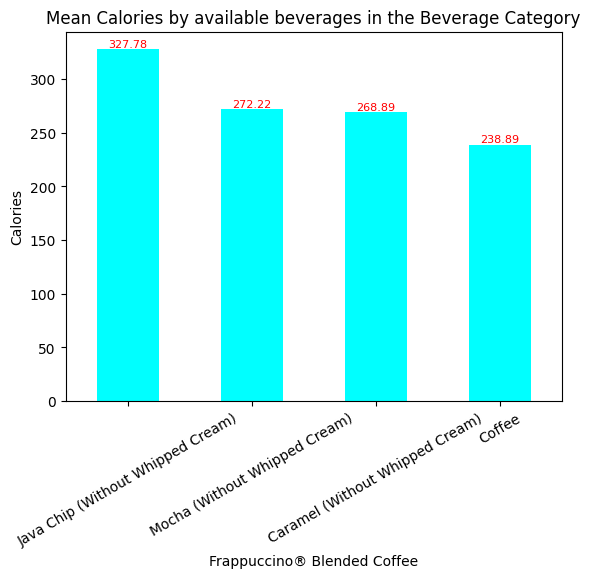

In [11]:
Beverage_category('Frappuccino® Blended Coffee')

## If you want are more concius about calories you can ask for available ingredients used in beverage and select accordingly

In [12]:
def Beverage_prep(i):
    l2 = df[df["Beverage_category"] == i]["Beverage"].unique()
    
    for j in l2:
        t = df[(df["Beverage_category"] == i) & (df["Beverage"] == j)].groupby("Beverage_prep")["Calories"].mean().sort_values(ascending=True)
        print("**IN", i, "beverage category we have", j)
        #print(t)
        
        # Plotting the bar plot
        plt.figure(figsize=(8, 6))  # Optional: Set the figure size
        bars = plt.bar(t.index, t.values, color='cyan')
        
        # Adding labels and title
        plt.xlabel("Beverage Prep")
        plt.ylabel("Calories")
        plt.title(f'Mean Calories by Beverage Prep for {j}')
        plt.xticks(rotation=45)  # Rotate labels by 45 degrees
        
        # Displaying the values on top of the bars
        for index, value in enumerate(t):
            plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=8,color="red")
            # Place the value labels above the bars with proper alignment and font size
        
        plt.tight_layout()
        plt.show()

**IN Frappuccino® Blended Coffee beverage category we have Coffee


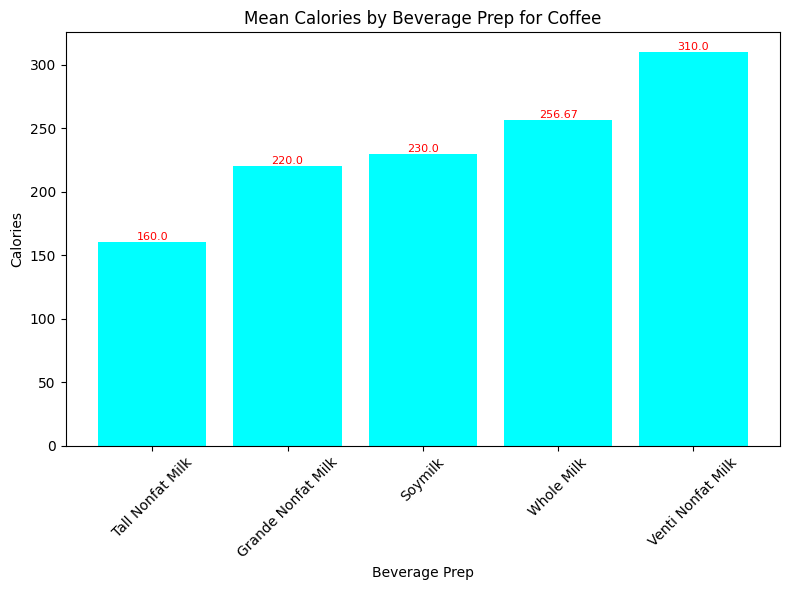

**IN Frappuccino® Blended Coffee beverage category we have Mocha (Without Whipped Cream)


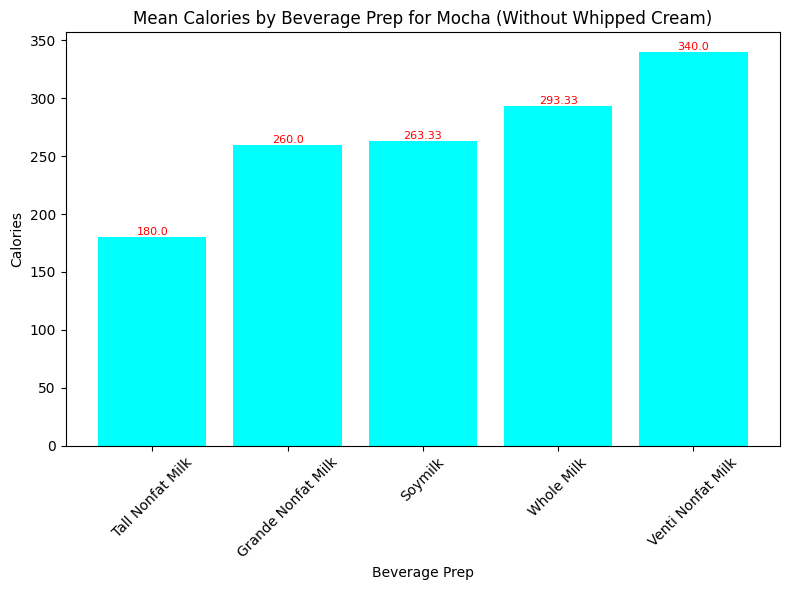

**IN Frappuccino® Blended Coffee beverage category we have Caramel (Without Whipped Cream)


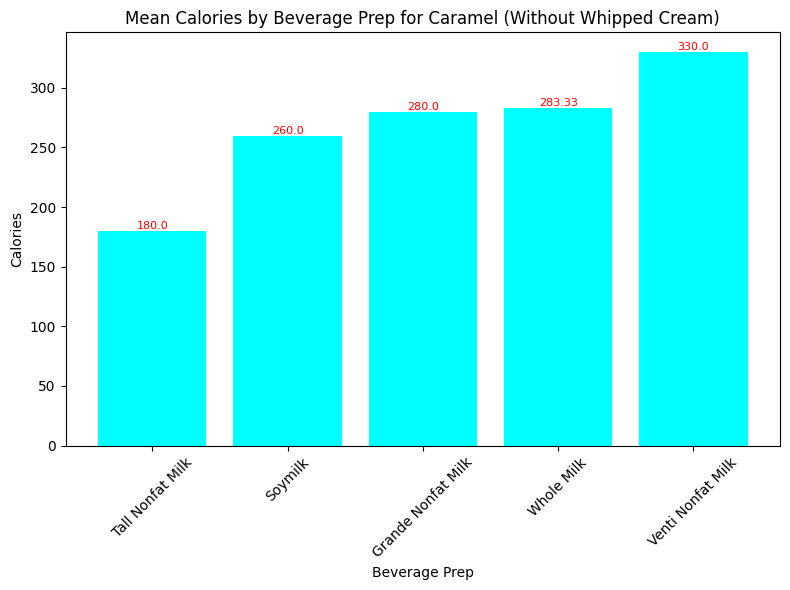

**IN Frappuccino® Blended Coffee beverage category we have Java Chip (Without Whipped Cream)


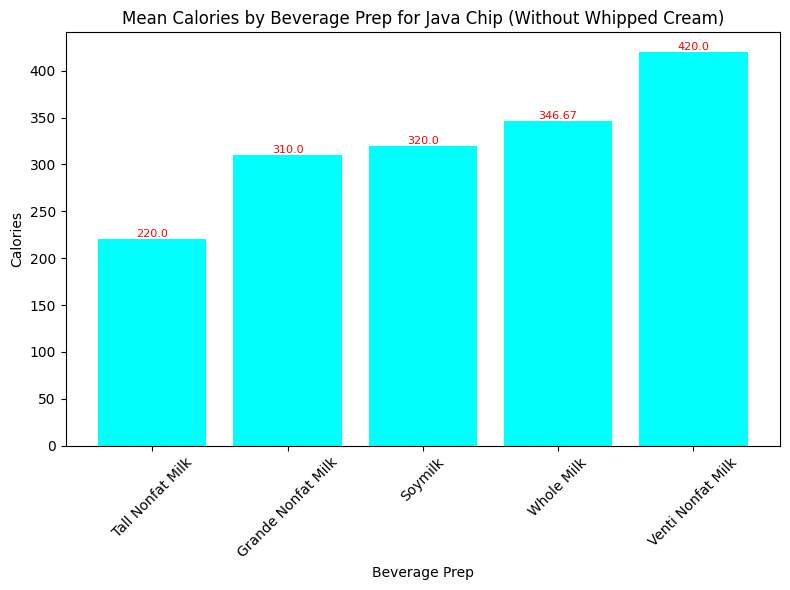

In [13]:
Beverage_prep('Frappuccino® Blended Coffee')

## Beverages ordered by Fibre(in grams)

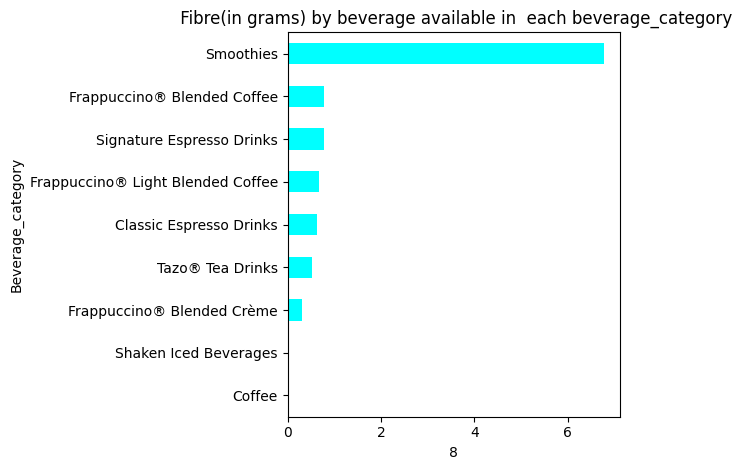

In [14]:
dd=df.groupby("Beverage_category")[' Dietary Fibre (g)'].mean().sort_values(ascending=True)
ax =  dd.plot.barh(color=["cyan"])
plt.xlabel(i)
plt.title(' Fibre(in grams) by beverage available in  each beverage_category')
plt.tight_layout()
plt.show()

## to check Fiber quantity in beverage cateogy

In [15]:
def fiber(i):
    l2=df[df["Beverage_category"]==i].groupby("Beverage")[" Dietary Fibre (g)"].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    plt.bar(l2.index, l2.values, color='cyan') 
    plt.xlabel(i)
    #plt.ylabel(j)
    plt.title('Histogram of Mean Calories by beverage avalable in  category')
    plt.xticks(rotation=45)  # Rotate labels by 45 degrees
    plt.tight_layout()
    return plt.show()
    
    

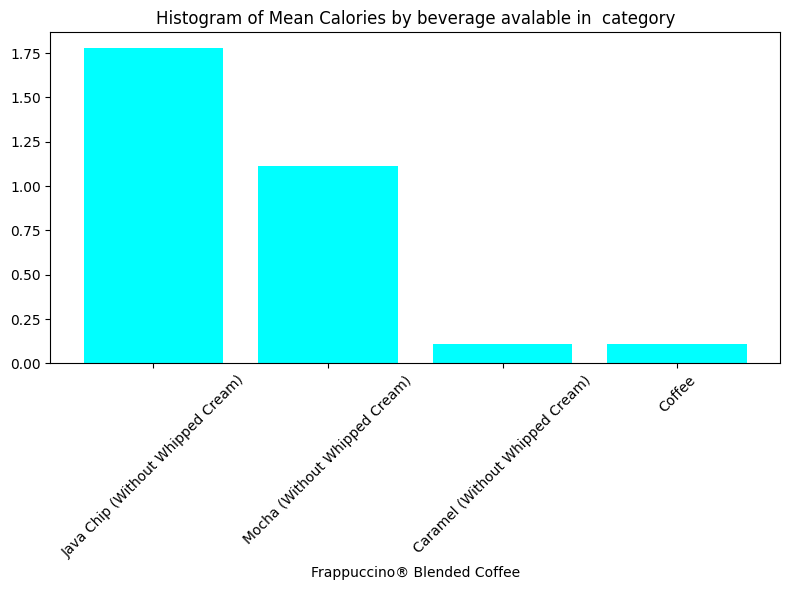

In [16]:
fiber('Frappuccino® Blended Coffee')